#Inicio de proyecto:
##importacion de bibliotecas


In [87]:
import pandas as pd
import numpy as np
from scipy import stats as st
from functools import reduce
from matplotlib import pyplot as plt
import seaborn as sns
import plotly_express as px 

# 2.- Trabajo y limpieza de datos

In [88]:
#importacion de archivo a trabajar 'games.csv' 
games_df = pd.read_csv('games.csv')
#Cambiando titulos de columnas a minusculas
games_df.columns = games_df.columns.str.lower()

#============== retrabajos columnas================
#trabajo columna 'name'
    #Cambiar los Nan a 'Unknown'
games_df['name'].fillna('Unknown', inplace= True)
        
##trabajo columna 'year of release'
    #cambiar tipo de datos a int en lugar de float. 
games_df['year_of_release'].fillna(0.0, inplace= True)
games_df['year_of_release'] = games_df['year_of_release'].astype(int)

#trabajo columna 'genre'
games_df['genre'].fillna('Unknown', inplace= True)

#trabajo columna 'critic_score'
games_df['critic_score'].fillna(0.0, inplace=True)

#trabajo columna 'user_score' 
games_df['user_score'].fillna(0.0, inplace=True)
        #Tambien se va a cambiar el score TBD debido a que sigue en discusion, por lo tanto no tiene un score aun, por lo tanto es 0 para fines estadisticos
        #se hara una nota donde se explica que algunos user_score siguen en deliberacion para justificar ciertos numeros\
games_df['user_score'].replace('tbd', 0.0, inplace=True)
games_df['user_score'] = games_df['user_score'].astype(float)


#trabajo columna 'rating' 
games_df['rating'].fillna('NR', inplace=True)

#Columna de ventas totales
games_df['total_sales'] = games_df['na_sales']+games_df['jp_sales']+games_df['eu_sales'] + games_df['other_sales']


#=============comprobacion datos despues de cambios =========#

## 3.- Analisis de Datos 
###    3.1 Cuantos juegos fueron lanzados en diferentes a;os, son significativos los datos de cada periodo? [1]
###    3.2 Variacion de ventas de una plataforma a otra. variaciones por a;o por plataforma.
###    3.3 Plataformas lideres en ventas
###    3.4 Diagrama de Caja para ventas globales de todos los juegos por plataforma
###    3.5 Grafico de dispersion y calcular las correlacion entre resenas y las ventas. saca conclusiones
###    3.6 Generar grafico de ventas por genero y ver generos mas rentables
    

3.1 Juegos lanzados por a;o, se comprobara si hay alguna relacion entre la venta de de juegos y el a;o que fueron lanzados [1]

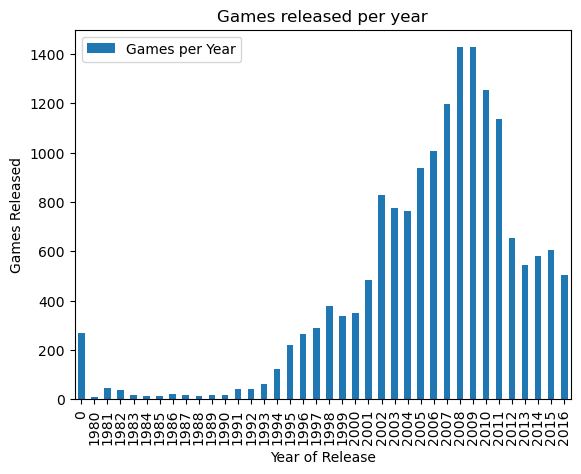

In [89]:
games_released_table = pd.pivot_table(games_df, index= 'year_of_release', values= 'name', aggfunc='count')
games_released_table.plot(kind='bar',xlabel='Year of Release',ylabel='Games Released',title='Games released per year')
plt.legend(['Games per Year'])

plt.show()

Conclusion inicial: Los a;os con mayor publicacion de juegos son del 2007 al 2011. los primeros a;os se podria deber a la cantidad de consolas que habia y la jugabilidad total de cada uno de los juegos publicados, antes se jugaban menos juegos con mayor competencia. En la actualidad nuevamente bajo la cantidad de consolas competidoras por lo que el numero de juego aumenta PERO en los a;os con mayores ventas podria ser resultado de lanzamiento de nuevas consolas que tuvieron que publicar mas juegos para la nueva generacion de equipamento, especificaciones y graficos. Esto se podria corroborar con la informacion de lanzamiento de las consolas respectivamente y comparar la publicaciones de juegos.

## 3.2 Variacion de ventas de una plataforma a otra.

In [95]:
display(games_df)
console_sales = games_df.groupby(['platform'])['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False)

display(console_sales)

sales_table = px.histogram(console_sales, x='platform')
sales_table.show()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,NR,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,NR,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,0.0,NR,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.0,0.0,NR,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,NR,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.0,0.0,NR,0.01


,platform,total_sales
16,PS2,1255.77
28,X360,971.42
17,PS3,939.65
26,Wii,907.51
4,DS,806.12
15,PS,730.86
6,GBA,317.85
18,PS4,314.14
19,PSP,294.05
13,PC,259.52



En su totalidad, la plataforma PS2 vendio platform           PS2
total_sales    1255.77
Name: 16, dtype: object millones de dolares.


Conclusion 2: La consola con mayor ventas dentro de la base de datos con $211 millones de dolares en total es la PlayStation 2 en el 2004. Se tomo una muestra de las top 20 ventas para hacer este estudio resultando en la grafica anterior. Tambien se nota cierto cambio de patron en la publicacion de consolas a la venta siendo en consolas Sony PlayStation un espacio de entre 4 a 6 a;os.

3.4 Ventas globales de las plataformas principales

<Axes: xlabel='total_sales', ylabel='platform'>

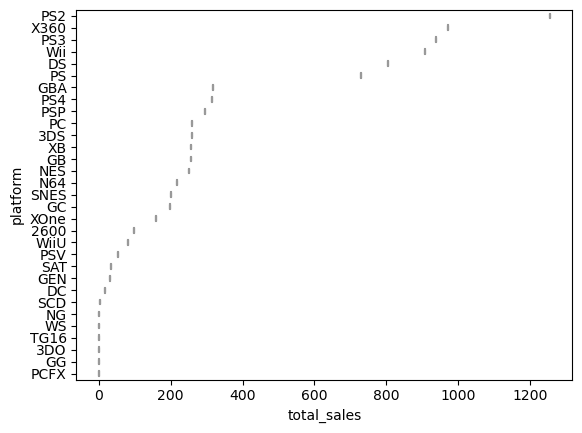

In [91]:
sns.boxplot(data=console_sales,saturation=1,color='white',width=.4,y='platform',x='total_sales')

Conclusion 3.4 Las ventas promedio de cada plataforma varian bastante entre si. esto se podria deber a la cantidad de tiempo que estuvo la consola antes de que saliera la nueva consola, dicho caso no aplicaria entre PS2 Y PS3. Tambien podria explicarse debido al genero de juegos mas vendidos por cada consola dado que al menos en el Caso de Nintendo casi no se tienen juegos pesados y de multijugador de plataforma para 16 o mas jugadores en linea. Nintendo se especializa en juegos locales y de historia enfocado a la experiencia mas que al multijugador. Lo que podria suceder con Nintendo como marca es que veamos que iteraciones de juegos se hayan ido actualizando o remasterizando como clasicos.


In [92]:
display(games_df)
games_genre = games_df.groupby(['name','genre'])['platform'].sum().reset_index()
display(games_genre)



,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,NR,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,NR,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,0.0,NR,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.0,0.0,NR,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,NR,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.0,0.0,NR,0.01


,name,genre,platform
0,Beyblade Burst,Role-Playing,3DS
1,Fire Emblem Fates,Role-Playing,3DS
2,Frozen: Olaf's Quest,Platform,3DSDS
3,Haikyu!! Cross Team Match!,Adventure,3DS
4,Tales of Xillia 2,Role-Playing,PS3
...,...,...,...
11560,thinkSMART: Chess for Kids,Misc,DS
11561,uDraw Studio,Misc,Wii
11562,uDraw Studio: Instant Artist,Misc,WiiX360
11563,wwe Smackdown vs. Raw 2006,Fighting,PS2
